### Linea de estampado

Una linea de estampado tiene dos procesos por los cuales atraviesa una pieza. Dependiendo el tipo de estampado los tiempos entre llegada y servicio son los siguientes:

1. prensas manuales
    * tiempo entre llegada (pj: acomodo de pieza de 1 a 2 minutos)
    * tiempo de servicio: 1 minuto
    
2. prensas progresivas
    * tiempo entre llegada (0 minutos)
    * tiempo de servicio: 3 minutos  

Tiempo de servicio     | 1 | 3 |
|------------------------|----|----|
| Probabilidad           | .54 | .46| 
| Probabilidad acumulada |.54| 1|





In [206]:
piezas_prensa_manual = [5900,13090,18138,29047,14123,13742,14389,19000,8662,6162,6542]
piezas_prensa_progresiva = [13880,8145,16292,5675,12486,13412,11816,10489,8106,13522,4408,7493]

piezas_prensa_manual_semana = sum(piezas_prensa_manual)
piezas_prensa_progresiva_semana = sum(piezas_prensa_progresiva)

# print(piezas_prensa_manual_semana)
# print(piezas_prensa_progresiva_semana)

probabilidad_prensa_manual = piezas_prensa_manual_semana / (piezas_prensa_manual_semana + piezas_prensa_progresiva_semana)
probabilidad_prensa_progresiva = piezas_prensa_progresiva_semana / (piezas_prensa_manual_semana + piezas_prensa_progresiva_semana)

# print(probabilidad_prensa_manual)
# print(probabilidad_prensa_progresiva)

print(round(probabilidad_prensa_manual,2))
print(round(probabilidad_prensa_progresiva,2))


0.54
0.46


In [207]:
import random
import numpy as np

num_piezas = 100
tiemposEntreLlegada = []
tiemposServicio = []

def simulacionLlegada():
    tiempo_ell = 0
    pieza = np.random.choice([0,1], p=[0.54,0.46])
    # si es 0 la pieza va a prensa manual
    if(pieza == 0):
        # print('pieza para prensa manual')
        tiempo_ell = evento_acomodo()
        return tiempo_ell
    # 1 la pieza va a prensa progresiva
    # print('pieza para prensa progresiva')
    return tiempo_ell

# Evento cada vez que la pieza va a prensa manual 
def evento_acomodo():
    return random.randint(1,2)


def simulacionServicio(tipo_prensado):
    if(tipo_prensado == 'progresiva'):
        return 3
    else:
        return 1
        

# cargar la lista de tiempos de entre llegada de las piezas y tiempos de servicio
for i in range(num_piezas):
    # primer pieza llega en tiempo 0
    if (i == 0):
        tiempo_ell = simulacionLlegada()
        # si es pieza para prensa progresiva el tiempo entre llegada es 0
        if(tiempo_ell == 0):
            tiemposEntreLlegada.append(0)
            tiemposServicio.append(simulacionServicio('progresiva'))
        # la pieza es para prensa manual
        else:
            tiemposEntreLlegada.append(0)
            tiemposServicio.append(simulacionServicio('manual'))
    else:
        tiempo_ell = simulacionLlegada()
        # si es pieza para prensa progresiva el tiempo entre llegada es 0
        if(tiempo_ell == 0):
            tiemposEntreLlegada.append(0)
            tiemposServicio.append(simulacionServicio('progresiva'))
        # la pieza es para prensa manual
        else:
            tiemposEntreLlegada.append(tiempo_ell)
            tiemposServicio.append(simulacionServicio('manual'))


print(f'Numero de piezas: {len(tiemposEntreLlegada)}')
print(f'Tiempos entre llegada: {tiemposEntreLlegada}')
print(f'Tiempos de servicio: {tiemposServicio}')

# print(len(tiemposEntreLlegada))
# print(len(tiemposServicio))

Numero de piezas: 100
Tiempos entre llegada: [0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0]
Tiempos de servicio: [3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3]


In [208]:
import pandas as pd
# crear tabla de simulacion
tabla_simulacion = []

pieza = 0
for i in range(len(tiemposEntreLlegada)):
    # inicio de servicio
    if(i == 0):
        # primer pieza llega en tiempo 0
        pieza += 1
        tabla_simulacion.append(
            [pieza,  # numero pieza/cliente
             0,  # tiempo entre llegada
             0,  # tiempo de llegada
             tiemposServicio[i],  # tiempo de servicio
             0,  # inicio de servicio
             0,  # tiempo de espera en la fila
             tiemposServicio[i],  # tiempo de finalizacion de servicio
             tiemposServicio[i],  # tiempo total de pieza/cliente en la prensa/el sistema
             0,  # tiempo de inactividad de prensas/servidor
             ])
    else:
        # obtener datos de la pieza/cliente anterior
        datos_pieza_anterior = tabla_simulacion[i-1]
        # aumentar el contador de pieza/cliente
        pieza += 1

        # tiempo entre llegada
        tiempo_entre_llegada = tiemposEntreLlegada[i]

        # tiempo de llegada
        tiempo_llegada = datos_pieza_anterior[2] + tiempo_entre_llegada

        # tiempo de servicio
        tiempo_servicio = tiemposServicio[i]

        # inicio de servicio
        if(datos_pieza_anterior[6] > tiempo_llegada):
            inicio_servicio = datos_pieza_anterior[6]
        else:
            inicio_servicio = tiempo_llegada

        # tiempo de espera en la fila
        tiempo_espera = inicio_servicio - tiempo_llegada

        # tiempo de finalizacion de servicio
        tiempo_finalizacion_servicio = inicio_servicio + tiempo_servicio

        # tiempo total de pieza/cliente en la prensa/el sistema
        tiempo_total = tiempo_finalizacion_servicio - tiempo_llegada

        # tiempo de inactividad de prensas/servidor
        if(datos_pieza_anterior[6] == tiempo_llegada):
            inactividad_servidor = 0
        else:
            inactividad_servidor = tiempo_llegada - datos_pieza_anterior[6]

        # añadir datos de pieza/cliente ala tabla de simulacion
        tabla_simulacion.append(
            [pieza,  # numero pieza/cliente
             tiempo_entre_llegada,  # tiempo entre llegada
             tiempo_llegada,  # tiempo de llegada
             tiempo_servicio,  # tiempo de servicio
             inicio_servicio,  # inicio de servicio
             tiempo_espera,  # tiempo de espera en la fila
             tiempo_finalizacion_servicio,  # tiempo de finalizacion de servicio
             tiempo_total,  # tiempo total de pieza/cliente en la prensa/el sistema
             inactividad_servidor,  # tiempo de inactividad de prensas/servidor
             ])

# print(f'Tabla simulación {tabla_simulacion}')
# print(len(tabla_simulacion))
columnas = [
    'Pieza',
    'Tiempo entre llegada',
    'Tiempo de llegada',
    'Tiempo de servicio',
    'Inicio de servicio',
    'Tiempo de espera en la fila',
    'Tiempo finalización de servicio',
    'Tiempo total del pieza/cliente en el sistema',
    'Tiempo de inactividad de prensas/servidor']


pd.set_option('display.max_rows', None)
df = pd.DataFrame(tabla_simulacion, columns=columnas)
df


,Pieza,Tiempo entre llegada,Tiempo de llegada,Tiempo de servicio,Inicio de servicio,Tiempo de espera en la fila,Tiempo finalización de servicio,Tiempo total del pieza/cliente en el sistema,Tiempo de inactividad de prensas/servidor
0,1,0,0,3,0,0,3,3,0
1,2,0,0,3,3,3,6,6,-3
2,3,2,2,1,6,4,7,5,-4
3,4,2,4,1,7,3,8,4,-3
4,5,0,4,3,8,4,11,7,-4
5,6,0,4,3,11,7,14,10,-7
6,7,0,4,3,14,10,17,13,-10
7,8,1,5,1,17,12,18,13,-12
8,9,0,5,3,18,13,21,16,-13
9,10,1,6,1,21,15,22,16,-15


1. Tiempo promedio de espera en la fila por cada pieza.

Average Waiting Time = tiempo total de piezas en la fila / numero total de piezas

In [209]:
tiempo_espera_fila = 0
for pieza in tabla_simulacion:
    tiempo_espera_fila += pieza[5]

average_wt = tiempo_espera_fila / len(tabla_simulacion)
print(f'Average waiting time: {average_wt}')

Average waiting time: 66.11


2. La probabilidad que un cliente tiene que esperar en la fila.

Probabilidad de esperar = numero de piezas que esperan / numero total de piezas

In [210]:
piezas_esperan = 0
for pieza in tabla_simulacion:
    if(pieza[5] > 0):
        piezas_esperan += 1

probabilidad_esperar = piezas_esperan / len(tabla_simulacion)
print(f'Probabilidad de esperar: {probabilidad_esperar}')

Probabilidad de esperar: 0.99


3. Probabilidad de que el servidor nunca este inactivo 

Probabilidad de que el servidor nunca este inactivo = tiempo total de inactividad del servidor / tiempo total de la simulación

In [211]:
tiempo_servidor_inactivo = 0
tiempo_simulacion = 0
for pieza in tabla_simulacion:
    tiempo_servidor_inactivo += pieza[8]
    tiempo_simulacion += pieza[7]

probabilidad_servidor_inactivo = -tiempo_servidor_inactivo / tiempo_simulacion
print(f'Probabilidad de que el servidor este inactivo: {round(probabilidad_servidor_inactivo,2)}')

Probabilidad de que el servidor este inactivo: 0.97


4. Tiempo promedio de servicio

Tiempo promedio de servicio = tiempo total de servicio / numero total de clientes


In [212]:
tiempo_total_servicio = 0
for pieza in tabla_simulacion:
    tiempo_total_servicio += pieza[3]

tiempo_promedio_servicio = tiempo_total_servicio / len(tabla_simulacion)
print(f'Tiempo promedio de servicio: {tiempo_promedio_servicio}')

Tiempo promedio de servicio: 2.0


5. Tiempo promedio de entre llegadas

Tiempo promedio de entre llegadas = suma de todos los tiempos de entre llegadas / (numero de llegadas - 1)

In [213]:
tiempo_entre_llegadas = 0
for pieza in tabla_simulacion:
    tiempo_entre_llegadas += pieza[1]

tiempo_promedio_entre_llegadas = tiempo_entre_llegadas / (len(tabla_simulacion)-1)
print(f'Tiempo promedio de entre llegadas: {round(tiempo_promedio_entre_llegadas,2)}')

Tiempo promedio de entre llegadas: 0.72


6. Promedio del tiempo que pasa un cliente en un sistema

Promedio del tiempo que pasa un cliente en un sistema = total de tiempo que los clientes pasan en el sistema / numero total de clientes
O
Promedio del tiempo que pasa un cliente en un sistema = Promedio del tiempo que pasa un cliente en la cola + Promedio del tiempo que pasa un cliente en servicio

In [214]:
tiempo_sistema = 0
for pieza in tabla_simulacion:
    tiempo_sistema += pieza[7]

promedio_cliente_sistema = tiempo_sistema / len(tabla_simulacion)
print(f'Tiempo prmedio que pasa un cliente en el sistema: {promedio_cliente_sistema}')

tiempo_fila = 0
for pieza in tabla_simulacion:
    tiempo_fila += pieza[5]

promedio_cliente_fila = tiempo_fila / len(tabla_simulacion)  

tiempo_servicio = 0
for pieza in tabla_simulacion:
    tiempo_servicio += pieza[3]

promedio_cliente_servicio = tiempo_servicio / len(tabla_simulacion)  

promedio_pieza_sistema = promedio_cliente_fila + promedio_cliente_servicio
print(promedio_pieza_sistema)

Tiempo prmedio que pasa un cliente en el sistema: 68.11
68.11


Distribuciones de tiempos de entre llegadas totales

Ocurrencias: [50, 29, 21]


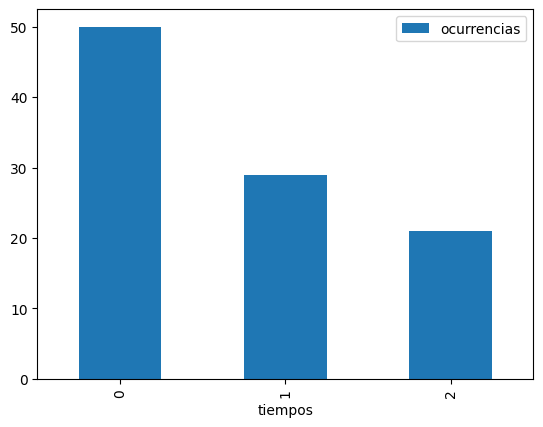

In [215]:
import pandas as pd

tiempos = [0,1,2]
ocurrencias = [0, 0, 0]

for pieza in tabla_simulacion:
    # print(pieza[5])
    if(pieza[1] == 0):
        ocurrencias[0] += 1
    elif(pieza[1] == 1):
        ocurrencias[1] += 1
    else:
        ocurrencias[2] += 1
    
df = pd.DataFrame({'tiempos': tiempos, 'ocurrencias': ocurrencias})

df.plot.bar(x='tiempos', y='ocurrencias')

print(f'Ocurrencias: {ocurrencias}')

Tiempos de espera totales

In [216]:
tiempos_espera = []
for pieza in tabla_simulacion:
    tiempos_espera.append(pieza[5])

df = pd.DataFrame({"a": tiempos_espera})
df["a"].value_counts()



67     3
56     3
36     3
35     3
68     3
108    3
110    3
111    2
57     2
62     2
34     2
33     2
109    2
66     2
112    2
3      2
116    2
88     2
71     2
4      2
52     2
92     1
87     1
90     1
86     1
91     1
83     1
104    1
93     1
96     1
99     1
102    1
79     1
105    1
113    1
114    1
115    1
117    1
119    1
120    1
123    1
80     1
0      1
78     1
30     1
7      1
10     1
12     1
13     1
15     1
16     1
17     1
18     1
20     1
21     1
24     1
27     1
39     1
75     1
40     1
41     1
44     1
47     1
50     1
53     1
60     1
63     1
65     1
70     1
72     1
74     1
126    1
Name: a, dtype: int64

Gráficamos los primeros 10 numeros correspondientes a los tiempos de espera con mas ocurrencias

C:\Users\kevin\AppData\Local\Temp\ipykernel_15240\1836671494.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df["a"].value_counts()[:10].plot(kind ="barh")


<AxesSubplot: >

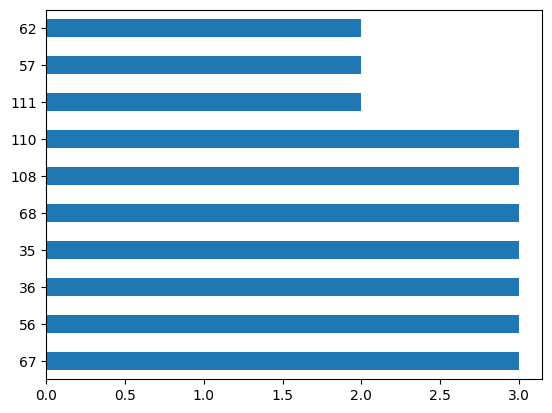

In [221]:
df["a"].value_counts()[:10].plot(kind ="barh")

In [218]:
# media de tiempo de espera en la fila
import statistics
media = statistics.mean(tiempos_espera)
print(f'Media de tiempo de espera en la fila: {media}')

Media de tiempo de espera en la fila: 66.11


### Conclusiones

Como conclusiones podemos observar en la simulación que la prensa siempre permanece activa ya que por si sola solo una no se da abasto en cuanto al servicio de estampado, ya que tenemos ademas una media en el tiempo de espera en la fila muy alto, entonces para demostrar que es factible se tendrian que implementar mas servidores y observar el comportamiento de la simulación.